In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#   for filename in filenames:
#        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/corr-table/num_corr_test.csv
/kaggle/input/sber-ai-comp/train_ai_comp_final_dp.parquet


## Libraries

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from tqdm import tqdm_notebook
from copy import deepcopy
import warnings
# import umap
# import torch

warnings.filterwarnings('ignore')

## Get data

По итогам блока:
- Данные получены
- Удалены колонки с одним значением
- Получены первичные гипотезы о категоиальных и числовых колонках
- Собран аггрегат по уникальным значениям

In [3]:
df = pd.read_parquet('../../data/input_data/train_ai_comp_final_dp.parquet')
df.head()

,id,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1,1761,1759,85,105469,191,46,0,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1,1761,1759,120,105610,144,71,0,...,0,0,0,0,0,0,0,0,0,0
2,2,0,1,890,1759,141,105227,191,11,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1,1599,966,30,102441,191,8,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1,1761,1759,85,104006,191,2,0,...,0,0,7642,0,0,0,0,0,0,7642


In [14]:
df.describe()

,id,target,sample_ml_new,feature1,feature2,feature3,feature4,feature5,feature6,feature7,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
count,519615.000000,519615.000000,519615.0,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000,...,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000,519615.000000
mean,346719.616297,0.035674,1.0,1578.921015,1308.410059,76.305130,94386.514377,139.003685,41.424410,35.771227,...,7200.840365,13172.209817,26496.441469,2915.599988,3018.929802,3278.940904,5142.696679,7200.840365,13172.209817,26496.441469
std,200003.314087,0.185477,0.0,315.711163,660.446967,44.797241,22230.941664,74.734122,40.463193,56.144121,...,17892.604226,27943.888849,45663.346437,8948.724876,9129.809167,9669.071467,13822.903288,17892.604226,27943.888849,45663.346437
min,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,173594.500000,0.000000,1.0,1600.000000,769.000000,37.000000,97557.000000,63.000000,12.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,347002.000000,0.000000,1.0,1668.000000,1759.000000,76.000000,102538.000000,191.000000,31.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,519978.500000,0.000000,1.0,1761.000000,1759.000000,117.000000,104624.000000,191.000000,63.000000,125.000000,...,0.000000,5823.000000,35789.500000,0.000000,0.000000,0.000000,0.000000,0.000000,5823.000000,35789.500000
max,693042.000000,1.000000,1.0,1761.000000,1759.000000,141.000000,106448.000000,191.000000,284.000000,125.000000,...,83903.000000,117161.000000,168455.000000,49909.000000,50250.000000,51714.000000,69081.000000,83903.000000,117161.000000,168455.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 519615 entries, 0 to 693042
Columns: 1079 entries, id to feature1076
dtypes: float64(2), int64(1077)
memory usage: 4.2 GB


In [16]:
df.shape

(519615, 1079)

In [4]:
unique_dict = {
    col: {
        'vals': df[col].unique(),
        'count': len(df[col].unique()),
        'high_cardinality': True if len(df[col].unique()) > 0.01 * len(df) else False
    }
    for col in df.columns
}

In [5]:
drop_cols = [col for col in df.columns if unique_dict[col]['count'] < 2]
num_cols = [col for col in df.columns if unique_dict[col]['high_cardinality']]
cat_cols = [col for col in df.columns if not unique_dict[col]['high_cardinality']]

In [6]:
cat_cols = list(set(cat_cols) - set(drop_cols))

In [7]:
len(drop_cols), len(num_cols), len(cat_cols)

(90, 297, 692)

In [8]:
df = df.drop(drop_cols, axis=1)

In [22]:
df.head()

,id,target,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,0,0,1761,1759,85,105469,191,46,0,6,...,28913,48985,84264,12045,12107,12510,21126,28913,48985,84264
1,1,0,1761,1759,120,105610,144,71,0,135,...,0,0,0,0,0,0,0,0,0,0
2,2,0,890,1759,141,105227,191,11,0,0,...,55949,70006,113317,33735,31242,12691,48682,55949,70006,113317
5,5,0,1599,966,30,102441,191,8,0,0,...,0,6872,8530,0,0,0,0,0,6872,8530
6,6,0,1761,1759,85,104006,191,2,0,0,...,0,0,7642,0,0,0,0,0,0,7642


## EDA

По итогам блока:
- feature642 - пустая более половины (источник не нашёл, можно просто дропнуть, либо ещё ресерч)
- определенно точно коррелируют: 699 и 702, 803 и 804 и 671, 684 и 705
- cледующие группы колонок:
    + like_285;
    + like_363;
    + like_429;
    + like_641;
    
    коррелируют не все вместе и требуют дополнительного изучения; остальные группы сжимаются в одну фичу => снижено количество непонятных колонок со 106 до 30
- 701 из 779 числовых колонок коррелируют между собой => снижаем размерность обучающих данных => из 495 образовавшихся групп только 95 не коррелируют полностью (доп ресёрч)

In [23]:
np.sum(df.isna().sum())

315324

In [14]:
na_dict = {
    col: df[col][df[col].isna()].index
    for col in df.columns
}

In [15]:
na_dict = dict(filter(lambda item: len(item[1]) != 0, na_dict.items()))

In [29]:
na_col, na_ind = 'feature642', na_dict['feature642']

In [32]:
dbl_check = {
    col: {
        'vals': df[df['id'].isin(na_ind)][col].unique(),
        'count': len(df[col][df['id'].isin(na_ind)].unique())
    }
    for col in df.columns
    if col not in ['id', 'target']
}

In [46]:
dbl_check = dict(filter(lambda item: item[1]['count'] <= 10, dbl_check.items()))
special_cols = {
    col: {
        'diff': unique_dict[col]['count'] - dbl_check[col]['count'],
        'extra': dbl_check[col]['vals']
    }
    for col in dbl_check.keys()
}
special_cols = dict(filter(lambda item: item[1]['diff'] > 0, special_cols.items()))

In [51]:
special_cols = dict(filter(lambda item: len(item[1]['extra']) / (len(item[1]['extra']) + item[1]['diff']) <= 0.5,
                           special_cols.items()))
del special_cols['feature642']

In [54]:
special_cols

{'feature66': {'diff': 23,
  'extra': array([45, 14, 41, 31, 30, 21, 20, 39, 25, 26])},
 'feature281': {'diff': 3, 'extra': array([8, 3, 6])},
 'feature325': {'diff': 3, 'extra': array([10,  5,  9])},
 'feature617': {'diff': 1, 'extra': array([0])},
 'feature643': {'diff': 1, 'extra': array([0])},
 'feature652': {'diff': 1, 'extra': array([0])},
 'feature658': {'diff': 1, 'extra': array([0])},
 'feature659': {'diff': 1, 'extra': array([0])},
 'feature660': {'diff': 1, 'extra': array([0])},
 'feature662': {'diff': 1, 'extra': array([0])},
 'feature668': {'diff': 1, 'extra': array([0])},
 'feature670': {'diff': 1, 'extra': array([0])},
 'feature671': {'diff': 1, 'extra': array([0])},
 'feature672': {'diff': 1, 'extra': array([0])},
 'feature682': {'diff': 1, 'extra': array([0])},
 'feature684': {'diff': 1, 'extra': array([0])},
 'feature685': {'diff': 1, 'extra': array([0])},
 'feature687': {'diff': 1, 'extra': array([0])},
 'feature693': {'diff': 1, 'extra': array([0])},
 'feature694': 

In [55]:
# здесь уж ручками переберём
extra_cols = {}
for col in special_cols.keys():
    extra_cols[col] = np.sum(df[df[col].isin(special_cols[col]['extra'])]['feature642'].isna()) / len(df[df[col].isin(special_cols[col]['extra'])])

In [60]:
# возьмём от 0.65
# посмотреть на предмет корреляции: 699 и 702; 803, 804 и 671; 684 и 705; 670 и 704; 685 и 682; 617 и 701;
# 281, 662 и 700

# sorted(extra_cols.items(), key=lambda item: item[1], reverse=True)

[('feature668', 0.9736008447729673),
 ('feature652', 0.7405865995265116),
 ('feature693', 0.7228438404775496),
 ('feature687', 0.708120647567803),
 ('feature659', 0.6854780155041456),
 ('feature703', 0.6799644625390309),
 ('feature698', 0.6703074081081254),
 ('feature706', 0.6498939597232442),
 ('feature672', 0.6252644728884306),
 ('feature699', 0.6147577418876871),
 ('feature702', 0.6147253831262636),
 ('feature658', 0.6146678648496391),
 ('feature697', 0.6138888348096954),
 ('feature803', 0.6122843672572215),
 ('feature804', 0.6122843672572215),
 ('feature671', 0.6122522683452972),
 ('feature684', 0.6116287911115939),
 ('feature705', 0.6116086235489221),
 ('feature643', 0.6115113633939497),
 ('feature694', 0.6111581660835942),
 ('feature660', 0.6086137478720406),
 ('feature670', 0.6079847600831408),
 ('feature704', 0.6076965179115178),
 ('feature685', 0.6068953305528236),
 ('feature682', 0.6068929944126982),
 ('feature66', 0.6068719699608729),
 ('feature325', 0.6068626262276341),
 ('

In [65]:
extra_cols = [item[0] for item in filter(lambda item: item[1] >= 0.65, extra_cols.items())]

In [77]:
corr_coefs = {col: df.loc[:, [col, 'feature642']].corr(method='kendall').iloc[0, 1] for col in extra_cols}

In [79]:
corr_coefs
# :(

{'feature652': -0.07271535903496054,
 'feature659': -0.06263877088990207,
 'feature668': 0.029414575148432758,
 'feature687': -0.04847517831250297,
 'feature693': -0.05316177211687997,
 'feature698': -0.05454825658192419,
 'feature703': -0.04776897662347411}

In [89]:
del special_cols, dbl_check, na_ind, na_dict, extra_cols, corr_coefs

In [93]:
# посмотреть на предмет корреляции:
# 699 и 702 (нет линейной) (по хи-квадрату есть);
# 803, 804 и 671 (сильная линейная по каждой паре);
# 684 и 705 (слабая линейная) (по хи-вадрату есть);
# 670 и 704 (нет линейной) (нет по хи-вадрату); 
# 685 и 682 (нет линейной) (нет по хи-квадрату); 
# 617 и 701 (нет линейной) (нет по хи-квадрату);
# 281, 662 и 700 (нет линейной ни по одной паре) (нет ни по одной паре)

pair1 = df.loc[:, ['feature699', 'feature702']].corr()
pair2 = df.loc[:, ['feature803', 'feature804', 'feature671']].corr()
pair3 = df.loc[:, ['feature684', 'feature705']].corr()
pair4 = df.loc[:, ['feature670', 'feature704']].corr()
pair5 = df.loc[:, ['feature685', 'feature682']].corr()
pair6 = df.loc[:, ['feature617', 'feature701']].corr()
pair7 = df.loc[:, ['feature281', 'feature662', 'feature700']].corr()

In [115]:
pair1 = pd.crosstab(df['feature699'], df['feature702'])
pair3 = pd.crosstab(df['feature684'], df['feature705'])
pair4 = pd.crosstab(df['feature670'], df['feature704'])
pair5 = pd.crosstab(df['feature685'], df['feature682'])
pair6 = pd.crosstab(df['feature617'], df['feature701'])

In [136]:
pair_7_3

feature700,0,1
feature662,,
0,519611,2
1,2,0


In [131]:
pair_7_1 = pd.crosstab(df['feature281'], df['feature662'])
pair_7_2 = pd.crosstab(df['feature281'], df['feature700'])
pair_7_3 = pd.crosstab(df['feature662'], df['feature700'])

In [138]:
del pair1, pair2, pair3, pair4, pair5, pair6, pair7, pair_7_1, pair_7_2, pair_7_3

In [9]:
unique_dict = dict(filter(lambda item: item[0] in df.columns, unique_dict.items()))

cat_cols, num_cols = [], []
for col in unique_dict.keys():
    if unique_dict[col]['count'] > 31:
        num_cols.append(col)
    
    else:
        cat_cols.append(col)

In [28]:
"""
ВСЕ ФИЧИ, О КОТОРЫХ ПИСАЛ НИЖЕ В КОММЕНТАХ СЧИТАЮТСЯ ПРОБЛЕМНЫМИ И ТРЕБУЮТ ИЗУЧЕНИЯ НА КАТЕГОРИИ

feature18 - дата получения последней зп или че-то такое, время короче (?); агрегат за месяц
feature247 - (очень мало уникальных значений, в основном 0 и 32)
feature285 - (очень мало уникальных, в основном 32)
feature302 - (очень мало уникальных, в основном 35, похоже на f285)
f363 - (всё ещё мало уникальных, в основном 30, но есть немного 0 и 1)
f410 - (очень! похожее распределение на f363, но верхняя граница другая ~20)
f412 - (очень! похожее распределение на f363, но верхняя граница другая ~ 25)
f425 - (очень! похожее распределение на f363, но верхняя граница другая ~ 25)
f429 - (не похоже ни на что, плотность смещена к 1 и окрестности)
f436 - (очень! похоже на f429)
f480 - очень похоже на f302 со сдвигом
f492 - очень мало уникальных, в основном 0
f538 - мало уникальных, серьёзное смещение в сторону верхней границы, есть что-то около 0
f540 - очень! похоже на f538 с другой верхней границей
f552 - очень похоже на f540 с другой верхней границей
f557 - довольно сильно похоже на f363
f558 - очень сильное смещение к верхней границе, будто ничего больше и нет (похоже на f302)
f641 - сильное смещение в сторону 0 с хвостиком и выбросом
f651 - что-то общее с f436
f653 - похоже по характеру на f651, но не то (не в одну группу)
f657 - похоже на f641, но без выброса
f725 - что-то похожее на f363 с другим верхом
f727 - основа в верхней границе, но более массивная область < 5
f737 - очень похоже на f285
f742 - основа в верхней границе, но более массивная область < 10
f743 - оч похоже на f363 с другой верхней границей
f746 - похоже на f247 с другим верхом
f747 - очень похоже на f746 с другим верхом 
f771 - что-то напоминающее f363
f985 - очень похоже на f641 без хвостика
f987 - че-то напоминает f653, но как будто вариативность меньше
f995 - очень похоже на f641 без хвостика
f997 - напоминает f987

f362 - оч похоже на f363 со смещённым верхом
f397 - оч похоже на f363 со смещённым верхом
f427 - похожий вайб на f429
f428 - похожий вайб на f429
f439 - очень похоже на f363 со смещённым верхом
f483 - так же похоже на f363 со смещённым верхом
f498 - очень похоже на f363 со смещённым верхом
f517 - вайб как у f429
f518 - вайб как у f429
f542 - очень похоже на f363 со смещённым верхом
f549 - очень похоже на f363 со смещённым верхом
f555 - очень похоже на f363 со смещённым верхом
f556 - очень похоже на f285 со смещённым верхом
f577 - сильный пик в верхней границе, "рваное" распределение около нуля
f584-586 - очень! похожи между собой с точностью до верхней границы
f598 - два пика и хвостик между ними; "рваное" распределение
f632 - близко по хакартеристикам к f492
f623 - близко по характеристикам к f492
f635 - близко по характеристикам к f492
f666 - вайб как у f429
f674 - близко по характеристикам к f492
f690 - вайб как у f429
f721 - сильный пик вверху, "рвано" около 0, зеркально к f598
f722 - очень похоже на f285 со смещённым верхом
f724 - очень похоже на f721
f733 - очень похоже на f721
f734 - очень похоже на f363 со свистящей флягой
f736 - очень похоже на f721
f739 - очень похоже на f721
f740 - очень похоже на f363 со свистящей флягой
f752 - очень похоже на f285 со смещённым верхом
f766 - очень похоже на f285 со смещённым верхом
f889 - очень похоже на f285 со смещённым верхом


---------
интересные совпадения:
feature23,28 - ПРАКТИЧЕСКИ ИДЕНТИЧНЫ, совпадают с f285
feature232,236 - ПРАКТИЧЕСКИ ИДЕНТИЧНЫ
f364,365,380 - ПРАКТИЧЕСКИ ИДЕНТИЧНЫ 364 и 365; ПРАКТИЧЕСКИ ЗЕРКАЛЬНЫ 364 и 380
f398,402 - ПРАКТИЧЕСКИ ИДЕНТИЧНЫ
f579,580,581 - ИДЕНТИЧНЫ
f589,590 - ИДЕНТИЧНЫ и похожи С 579-581
f592,593 - ИДЕНТИЧНЫ 
f717,718 - очень похожи вплоть до выброса в одном месте

f712 - в ней есть даже значение -1 (уникально)
"""
# dict(filter(lambda item: item[0] in cat_cols, unique_dict.items()))

<Axes: xlabel='feature247', ylabel='Count'>

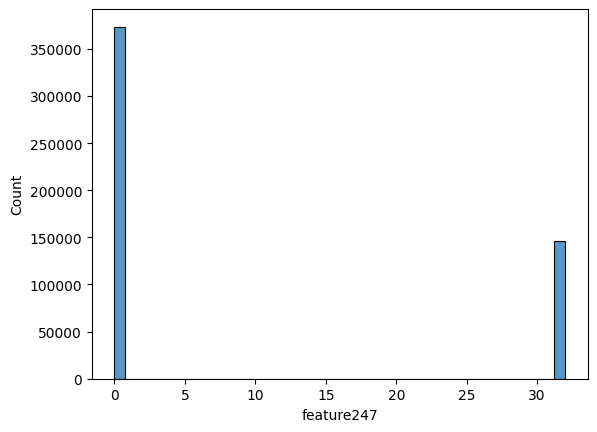

In [9]:
sns.histplot(df['feature247'])
# sns.histplot(df['feature232'])
# sns.histplot(df['feature620'])

In [10]:
# по визуальному анализу не получилось определить категории более точно, так что доверимся интуиции
cat_cols, num_cols = [], []
for col in unique_dict.keys():
    if unique_dict[col]['count'] > 8:
        num_cols.append(col)
    
    else:
        cat_cols.append(col)

In [11]:
groups = {
    
    'like_247': [
        'feature247',
        'feature746',
        'feature747'
    ],

    'like_302': [
        'feature302',
        'feature480',
    ],
    
    'like_558': [
        'feature558',
        'feature752',
    ],
    
    'like_737': [
        'feature737',
        'feature556',
    ],
    
    'like_722': [
        'feature737',
        'feature722',
        'feature766',
    ],
    
    'like_889': [
        'feature889',
        'feature23',
        'feature28'
    ],

    'like_363': [
        'feature363',
        'feature557',
        'feature725',
        'feature743',
        'feature771',
        'feature362',
        'feature542',
        'feature549',
        'feature555',
        'feature740'
    ],
    
    'like_410': [
        'feature410',
        'feature412',
        'feature483',
        'feature734'
    ],
    
    'like_425': [
        'feature425',
        'feature557',
        'feature542'
    ],
    
    'like_557': [
        'feature557',
        'feature362',
        'feature397',
        'feature498',
        'feature542',
        'feature734'
    ],
    
    'like_725': [
        'feature725',
        'feature743',
        'feature771',
        'feature362',
        'feature542',
        'feature734',
        'feature740'
    ],
    
    'like_397': [
        'feature397',
        'feature439',
        'feature483'
    ],
    
    'like_439': [
        'feature439',
        'feature549',
        'feature555'
    ],
    
    'like_483': [
        'feature483',
        'feature498'
    ],

    'like_429': [
        'feature429',
        'feature436',
        'feature427',
        'feature428',
        'feature517',
        'feature518',
        'feature666',
        'feature690',
        'feature651',
        'feature987',
        'feature997'
    ],
    
    'like_653': [
        'feature653',
        'feature987'
    ],

    'like_492': [
        'feature492',
        'feature632',
        'feature623',
        'feature635',
        'feature674'
    ],

    'like_538': [
        'feature538',
        'feature540',
        'feature552'
    ],

    'like_641': [
        'feature641',
        'feature657'
    ],
    
    'like_985': [
        'feature985',
        'feature995'
    ],

    'like_727': [
        'feature727',
        'feature742' 
    ],

    'like_577': [
        'feature577'
    ],

    'like_584': [
        'feature584',
        'feature585',
        'feature586'
    ],

    'like_598': [
        'feature598',
        'feature721',
        'feature724',
        'feature733',
        'feature736',
        'feature739'
    ],

    'like_232': [
        'feature232',
        'feature236'
    ],

    'like_364': [
        'feature364',
        'feature365',
        'feature380'
    ],

    'like_398': [
        'feature398',
        'feature402'
    ],

    'like_579': [
        'feature579',
        'feature580',
        'feature581',
        'feature589',
        'feature590'
    ],

    'like_592': [
        'feature592',
        'feature593'
    ],

    'like_718': [
        'feature718',
        'feature719'
    ]
}

In [10]:
# corr_tests = {}
# error_pairs = {}

# for group in tqdm_notebook(groups.keys()) :
#     general_key = group[-3:].replace('_', '')
#     corr_tests[general_key] = {}
#     error_pairs[general_key] = {}
#     if len(groups[group]) >= 2:
        
#         for ind in range(len(groups[group]) - 1):
#             tmp_col = groups[group][ind]
            
#             for sec_ind in range(ind + 1, len(groups[group])):
#                 cur_col = groups[group][sec_ind]
#                 corr_value = chi2_contingency(
#                     pd.crosstab(df[tmp_col], df[cur_col]))[1]
                
#                 if corr_value < 0.05:
#                     corr_tests[general_key][(tmp_col, cur_col)] = corr_value
                    
#                 else:
#                     error_pairs[general_key][(tmp_col, cur_col)] = corr_value

/tmp/ipykernel_33/258758779.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for group in tqdm_notebook(groups.keys()) :


  0%|          | 0/18 [00:00<?, ?it/s]

In [11]:
# for group in groups.keys() :
#     general_key = group[-3:].replace('_', '')
#     print(f'{group}: len {len(groups[group]) * (len(groups[group]) - 1) / 2},\tcorr tests {len(corr_tests[general_key])}')

like_18: len 0.0,	corr tests 0
like_247: len 3.0,	corr tests 3
like_285: len 66.0,	corr tests 10
like_363: len 153.0,	corr tests 66
like_429: len 66.0,	corr tests 65
like_492: len 10.0,	corr tests 10
like_538: len 3.0,	corr tests 3
like_641: len 6.0,	corr tests 2
like_727: len 1.0,	corr tests 1
like_577: len 0.0,	corr tests 0
like_584: len 3.0,	corr tests 3
like_598: len 15.0,	corr tests 15
like_232: len 1.0,	corr tests 1
like_364: len 3.0,	corr tests 3
like_398: len 1.0,	corr tests 1
like_579: len 10.0,	corr tests 10
like_592: len 1.0,	corr tests 1
like_718: len 1.0,	corr tests 1


In [24]:
# corr_tests_tmp = dict(filter(lambda item: item[0] in ['285', '363', '429', '641'], corr_tests.items()))
# error_pairs_tmp = dict(filter(lambda item: item[0] in ['285', '363', '429', '641'], error_pairs.items()))

# uncorr_grs = {}
# corr_grs = {}

# for key in corr_tests_tmp.keys():
#     cur_item = corr_tests_tmp[key]
#     for pair in corr_tests_tmp[key].keys():
#         if corr_grs.get(pair[0]):
#             corr_grs[pair[0]].append(pair[1])

#         else:
#             corr_grs[pair[0]] = [pair[1]]
        
# for key in error_pairs_tmp.keys():
#     cur_item = error_pairs_tmp[key]
#     for pair in error_pairs_tmp[key].keys():
#         if uncorr_grs.get(pair[0]):
#             uncorr_grs[pair[0]].append(pair[1])

#         else:
#             uncorr_grs[pair[0]] = [pair[1]]

In [38]:
"""
285 - на выброс
302-480
558-752
737-556
737-722-766
889-23-28
=====
363-557-725-743-771-362-542-549-555-740
410-412-483-734
425-557-542
557-362-397-498-542-734
725-743-771-362-542-734-740
397-439-483
439-549-555
483-498
=====
429-436-427-428-517-518-666-690-651-987-997
653-987
=====
641-657
985-995
"""
# dict(filter(lambda item: item[0] in groups['like_641'], corr_grs.items()))

{'feature641': ['feature657'], 'feature985': ['feature995']}

In [44]:
print(f'new len: {len(groups)}; old len: {np.sum([len(item) for item in groups.values()])}')

new len: 30; old len: 106


In [14]:
# num_cols_test = df[num_cols[1:]].corr(method='spearman')

In [12]:
# num_cols_test.to_csv('../../data/intermediate_data/num_corr_test.csv')
num_cols_test = pd.read_csv('../../data/intermediate_data/num_corr_test.csv')

In [13]:
num_cols_test

,Unnamed: 0,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
0,feature1,1.000000,0.569348,-0.026646,-0.062658,0.029062,-0.027182,0.094056,0.087381,0.052008,...,-0.030449,-0.031488,-0.021074,-0.029161,-0.029659,-0.027968,-0.030597,-0.030449,-0.031488,-0.021074
1,feature2,0.569348,1.000000,-0.034618,-0.061681,0.026925,-0.023140,0.082427,0.077861,0.034838,...,-0.032260,-0.029965,-0.014216,-0.031836,-0.032462,-0.031144,-0.033010,-0.032260,-0.029965,-0.014216
2,feature3,-0.026646,-0.034618,1.000000,0.171813,0.026184,0.079241,-0.026095,0.003190,0.047612,...,-0.040995,-0.045272,-0.038789,-0.034072,-0.035744,-0.036153,-0.037570,-0.040995,-0.045272,-0.038789
3,feature4,-0.062658,-0.061681,0.171813,1.000000,-0.067316,0.125094,-0.208627,-0.147301,-0.041620,...,-0.030068,-0.029412,-0.016060,-0.028475,-0.025230,-0.022988,-0.030629,-0.030068,-0.029412,-0.016060
4,feature5,0.029062,0.026925,0.026184,-0.067316,1.000000,0.060037,0.171347,0.154003,0.083603,...,-0.080113,-0.086666,-0.088988,-0.070668,-0.072727,-0.073725,-0.076749,-0.080113,-0.086666,-0.088988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
773,feature1072,-0.027968,-0.031144,-0.036153,-0.022988,-0.073725,-0.047126,-0.076367,-0.084923,-0.071596,...,0.835895,0.730921,0.609270,0.654914,0.702049,1.000000,0.704763,0.835895,0.730921,0.609270
774,feature1073,-0.030597,-0.033010,-0.037570,-0.030629,-0.076749,-0.056301,-0.076973,-0.086503,-0.075516,...,0.925993,0.799883,0.659395,0.874519,0.887718,0.704763,1.000000,0.925993,0.799883,0.659395
775,feature1074,-0.030449,-0.032260,-0.040995,-0.030068,-0.080113,-0.060905,-0.083261,-0.091928,-0.082751,...,1.000000,0.863193,0.709513,0.810436,0.824672,0.835895,0.925993,1.000000,0.863193,0.709513
776,feature1075,-0.031488,-0.029965,-0.045272,-0.029412,-0.086666,-0.067648,-0.096323,-0.102644,-0.097900,...,0.863193,1.000000,0.820937,0.702228,0.717312,0.730921,0.799883,0.863193,1.000000,0.820937


In [14]:
num_cols_test = num_cols_test.set_index('Unnamed: 0')
num_cols_test

,feature1,feature2,feature3,feature4,feature5,feature6,feature7,feature8,feature9,feature10,...,feature1067,feature1068,feature1069,feature1070,feature1071,feature1072,feature1073,feature1074,feature1075,feature1076
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
feature1,1.000000,0.569348,-0.026646,-0.062658,0.029062,-0.027182,0.094056,0.087381,0.052008,0.094057,...,-0.030449,-0.031488,-0.021074,-0.029161,-0.029659,-0.027968,-0.030597,-0.030449,-0.031488,-0.021074
feature2,0.569348,1.000000,-0.034618,-0.061681,0.026925,-0.023140,0.082427,0.077861,0.034838,0.082427,...,-0.032260,-0.029965,-0.014216,-0.031836,-0.032462,-0.031144,-0.033010,-0.032260,-0.029965,-0.014216
feature3,-0.026646,-0.034618,1.000000,0.171813,0.026184,0.079241,-0.026095,0.003190,0.047612,-0.026090,...,-0.040995,-0.045272,-0.038789,-0.034072,-0.035744,-0.036153,-0.037570,-0.040995,-0.045272,-0.038789
feature4,-0.062658,-0.061681,0.171813,1.000000,-0.067316,0.125094,-0.208627,-0.147301,-0.041620,-0.208638,...,-0.030068,-0.029412,-0.016060,-0.028475,-0.025230,-0.022988,-0.030629,-0.030068,-0.029412,-0.016060
feature5,0.029062,0.026925,0.026184,-0.067316,1.000000,0.060037,0.171347,0.154003,0.083603,0.171337,...,-0.080113,-0.086666,-0.088988,-0.070668,-0.072727,-0.073725,-0.076749,-0.080113,-0.086666,-0.088988
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
feature1072,-0.027968,-0.031144,-0.036153,-0.022988,-0.073725,-0.047126,-0.076367,-0.084923,-0.071596,-0.076374,...,0.835895,0.730921,0.609270,0.654914,0.702049,1.000000,0.704763,0.835895,0.730921,0.609270
feature1073,-0.030597,-0.033010,-0.037570,-0.030629,-0.076749,-0.056301,-0.076973,-0.086503,-0.075516,-0.076974,...,0.925993,0.799883,0.659395,0.874519,0.887718,0.704763,1.000000,0.925993,0.799883,0.659395
feature1074,-0.030449,-0.032260,-0.040995,-0.030068,-0.080113,-0.060905,-0.083261,-0.091928,-0.082751,-0.083262,...,1.000000,0.863193,0.709513,0.810436,0.824672,0.835895,0.925993,1.000000,0.863193,0.709513


In [15]:
cor_group_num = {}

for ind in range(len(num_cols_test) - 1):
    fcol = num_cols_test.columns[ind]
    cor_group_num[fcol] = []
    for sind in range(ind + 1, len(num_cols_test)):
        scol = num_cols_test.columns[sind]
        
        if np.abs(num_cols_test.loc[fcol, scol]) >= 0.8:
            cor_group_num[fcol].append(scol)
            
    if len(cor_group_num[fcol]) == 0:
        del cor_group_num[fcol]

In [16]:
# len(a), len(num_cols)

In [17]:
errors = []
for key, val in cor_group_num.items():
    col_group = [key, *val]
    
    if np.min(np.abs(num_cols_test.loc[col_group, col_group])) < 0.8:
        errors.append(col_group)

In [18]:
"""
Итоги анализа по группам числовых:

Все группы корреляции, соедржащиеся в total_groups, не нуждаются в изменениях и коррелируют абсолютно
все внутри группы; необходимо изменить только в тех случаях, если имеются ещё коррелирующие колонки:
уменьшили выход с 400 новых колонок до 243 (new_total_groups)

Для тех групп, в которых корреляция неполная: сокращаем до полной корреляции (группы максимальной
размерности), после чего производим фильтрацию как выше => получаем новые группы и добавляем их в
new_total_groups

ИТОГО: 283 колонки вместо 779 + переменная groups на 30 
"""

error_keys = [elem[0] for elem in errors]

In [19]:
total_groups = dict(filter(lambda item: item[0] not in error_keys, cor_group_num.items()))

In [20]:
new_total_groups = deepcopy(total_groups)

for key in tqdm_notebook(total_groups.keys()):
    cur_group = total_groups[key]
    
    for col in cur_group:
        if col in new_total_groups.keys():
            new_total_groups[col] = list(set(total_groups[col]) - set(cur_group))
            
            if len(new_total_groups[col]) == 0:
                del new_total_groups[col]

  0%|          | 0/402 [00:00<?, ?it/s]

In [21]:
result = {}

for group in errors:
    cur_group = deepcopy(group)
    while np.max(np.sum(np.abs(num_cols_test.loc[cur_group, cur_group] < 0.8))) != 0:
        del_col = cur_group[np.argmax(np.sum(np.abs(num_cols_test.loc[cur_group, cur_group] < 0.8)))]
        cur_group.remove(del_col)
        
    result[cur_group[0]] = cur_group[1:]

In [22]:
tmp = deepcopy(result)

for key in tqdm_notebook(result.keys()):
    cur_group = result[key]
    
    for col in cur_group:
        if col in tmp.keys():
            tmp[col] = list(set(result[col]) - set(cur_group))
            
            if len(tmp[col]) == 0:
                del tmp[col]

  0%|          | 0/93 [00:00<?, ?it/s]

In [23]:
new_total_groups.update(tmp)

In [24]:
# немного преобразуем словарь groups
new_total_groups_cat = {elem[0]: elem[1:] for elem in groups.values()}
new_total_groups_cat = dict(filter(lambda item: len(item[1]) > 0, new_total_groups_cat.items()))

In [25]:
del groups, num_cols_test, cor_group_num, errors, error_keys, total_groups, result, tmp

In [26]:
not_cat_cols = [col for col in cat_cols if unique_dict[col]['count'] != 2]
cat_cols = list(set(cat_cols) - set(not_cat_cols))

In [26]:
"""
f23 - все значения в верхней границе; f281, f321, f325, f390, f393, f394, f404, f731, f748, f768, f770,
f774, f775, f886, f889, f910, f26, f27, f28

f232 - два пика в 0 и верхней границе, смещение в 0; f241, f391, f392, f398, f402, f582, f583, f584, f586
f754(зеркально), f753, f236, f237

f364 - пик в верхней границе, есть редкие хвосты в области 0; f365, f430, f471, f563, f564, f565, f717,
f903

f366 - есть наблюдения по всем значениям, пик в предверхней границе; f758, f800(зеркально)

f380 - пик в 0, есть хвостики около нуля и в верхней границе; f620, f629, f642, f677, f730(зеркально)

f579 - два пика (смещение в 0 и в верхней границе) с хвостиками между; f580, f581, f592, f593, f681

f648 - пик в 0, дальше - меньше; f757

f712 - уникальна
f718 - пик в верхней границе, в остальных по чуть-чуть
f799 - почти равномерное по категориям
"""

'\nf23 - все значения в верхней границе; f281, f321, f325, f390, f393, f394, f404, f731, f748, f768, f770,\nf774, f775, f886, f889, f910, f26, f27, f28\n\nf232 - два пика в 0 и верхней границе, смещение в 0; f241, f391, f392, f398, f402, f582, f583, f584, f586\nf754(зеркально), f753, f236, f237\n\nf364 - пик в верхней границе, есть редкие хвосты в области 0; f365, f430, f471, f563, f564, f565, f717,\nf903\n\nf366 - есть наблюдения по всем значениям, пик в предверхней границе; f758, f800(зеркально)\n\nf380 - пик в 0, есть хвостики около нуля и в верхней границе; f620, f629, f642, f677, f730(зеркально)\n\nf579 - два пика (смещение в 0 и в верхней границе) с хвостиками между; f580, f581, f592, f593, f681\n\nf648 - пик в 0, дальше - меньше; f757\n\nf712 - уникальна\nf718 - пик в верхней границе, в остальных по чуть-чуть\nf799 - почти равномерное по категориям\n'

<Axes: xlabel='feature910', ylabel='Count'>

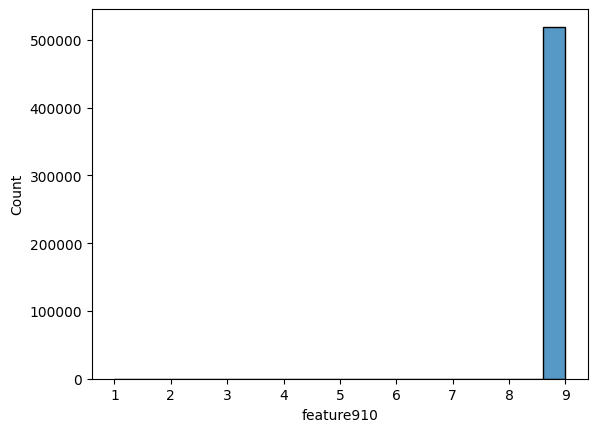

In [27]:
# sns.histplot(df['feature232'])
sns.histplot(df['feature910'])

In [27]:
groups = {
    'like_23': [
        'feature23',
        'feature26',
        'feature27',
        'feature28',
        'feature281',
        'feature321',
        'feature325',
        'feature390',
        'feature393',
        'feature394',
        'feature404',
        'feature731',
        'feature748',
        'feature768',
        'feature770',
        'feature774',
        'feature775',
        'feature886',
        'feature889',
        'feature910'
    ],
    
    'like_232': [
        'feature232',
        'feature241',
        'feature391',
        'feature392',
        'feature398',
        'feature402',
        'feature582',
        'feature583',
        'feature584',
        'feature586',
        'feature754',
        'feature753',
        'feature236',
        'feature237'
    ],
    
    'like_364': [
        'feature364',
        'feature365',
        'feature430',
        'feature471',
        'feature563',
        'feature564',
        'feature565',
        'feature717',
        'feature903'
    ],
    
    'like_366': [
        'feature366',
        'feature758',
        'feature800'
    ],
    
    'like_380': [
        'feature380',
        'feature620',
        'feature629',
        'feature642',
        'feature677',
        'feature730'
    ],
    
    'like_579': [
        'feature579',
        'feature580',
        'feature581',
        'feature592',
        'feature593',
        'feature681'
    ],
    
    'like_648': [
        'feature648',
        'feature757'
    ]
}

In [28]:
corr_tests = {}
error_pairs = {}

for group in tqdm_notebook(groups.keys()) :
    general_key = group[-3:].replace('_', '')
    corr_tests[general_key] = {}
    error_pairs[general_key] = {}
    if len(groups[group]) >= 2:
        
        for ind in range(len(groups[group]) - 1):
            tmp_col = groups[group][ind]
            
            for sec_ind in range(ind + 1, len(groups[group])):
                cur_col = groups[group][sec_ind]
                corr_value = chi2_contingency(
                    pd.crosstab(df[tmp_col], df[cur_col]))[1]
                
                if corr_value < 0.05:
                    corr_tests[general_key][(tmp_col, cur_col)] = corr_value
                    
                else:
                    error_pairs[general_key][(tmp_col, cur_col)] = corr_value
                    
for group in groups.keys() :
    general_key = group[-3:].replace('_', '')
    print(f'{group}: len {len(groups[group]) * (len(groups[group]) - 1) / 2},\tcorr tests {len(corr_tests[general_key])}')

  0%|          | 0/7 [00:00<?, ?it/s]

like_23: len 190.0,	corr tests 22
like_232: len 91.0,	corr tests 91
like_364: len 36.0,	corr tests 27
like_366: len 3.0,	corr tests 3
like_380: len 15.0,	corr tests 14
like_579: len 15.0,	corr tests 15
like_648: len 1.0,	corr tests 1


In [29]:
#like_232, like_366, like_579, like_648 - ок
corr_tests_tmp = dict(filter(lambda item: item[0] in ['23', '364', '380'], corr_tests.items()))
error_pairs_tmp = dict(filter(lambda item: item[0] in ['23', '364', '380'], error_pairs.items()))

uncorr_grs = {}
corr_grs = {}

for key in corr_tests_tmp.keys():
    cur_item = corr_tests_tmp[key]
    for pair in corr_tests_tmp[key].keys():
        if corr_grs.get(pair[0]):
            corr_grs[pair[0]].append(pair[1])

        else:
            corr_grs[pair[0]] = [pair[1]]
        
for key in error_pairs_tmp.keys():
    cur_item = error_pairs_tmp[key]
    for pair in error_pairs_tmp[key].keys():
        if uncorr_grs.get(pair[0]):
            uncorr_grs[pair[0]].append(pair[1])

        else:
            uncorr_grs[pair[0]] = [pair[1]]

In [30]:
# отфильтруем коррелирующие группы по максимальному размеру коррелирующих групп
new_corr_grs = deepcopy(corr_grs)
error_cols = []

for key in tqdm_notebook(corr_grs.keys()):
    cur_group = corr_grs[key]
    if key in new_corr_grs.keys():
        for col in cur_group:
            if col in new_corr_grs.keys():
                if len(set(corr_grs[col]) - set([elem for elem in cur_group if elem != col])) == 0:
                    new_corr_grs[col] = list(set(corr_grs[col]) - set(cur_group))

                    if len(new_corr_grs[col]) == 0:
                        del new_corr_grs[col]
                else:
                    if len(list(set(corr_grs[col]) - set(cur_group))) != 0:
                        new_corr_grs[col] = list(set(corr_grs[col]) - set(cur_group))

                    else:
                        error_cols.append(col)

                    new_corr_grs[key].remove(col)

            else:
                if col != cur_group[-1]:
                    error_cols.append(col)
                    try:
                        new_corr_grs[key].remove(col)
                    except:
                        print(col)

  0%|          | 0/21 [00:00<?, ?it/s]

feature394
feature404


In [31]:
new_corr_grs

{'feature23': ['feature27', 'feature28', 'feature889'],
 'feature321': ['feature910'],
 'feature390': ['feature394', 'feature404'],
 'feature393': ['feature910', 'feature731'],
 'feature768': ['feature770'],
 'feature364': ['feature365',
  'feature471',
  'feature563',
  'feature564',
  'feature565',
  'feature717',
  'feature903'],
 'feature380': ['feature620',
  'feature629',
  'feature642',
  'feature677',
  'feature730']}

In [32]:
# последние 3 - окнули
error_cols = error_cols[0]

In [33]:
# эта колонка уже рассматривается в проблемных - окнули
error_cols

'feature886'

In [34]:
new_total_groups_cat.update(new_corr_grs)

In [35]:
# ОТФИЛЬТРОВАТЬ ПРОШЕДШИЕ ГРУППЫ КОМБИНАТОРИКА
correct_grs = {}
for col in tqdm_notebook(uncorr_grs.keys()):
    if col not in new_corr_grs.keys():
        group = [col, *uncorr_grs[col]]
        
    else:
        group = uncorr_grs[col]
        
    for find in range(len(group) - 1):
        correct_grs[group[find]] = []
        for sind in range(find + 1, len(group)):
            value = chi2_contingency(pd.crosstab(df[group[find]], df[group[sind]]))[1]
            
            if value < 0.05:
                correct_grs[group[find]].append(group[sind])
                
        if len(correct_grs[group[find]]) == 0:
            del correct_grs[group[find]]
            
for col in correct_grs.keys():
    correct_grs[col] = list(set(correct_grs[col]))

  0%|          | 0/24 [00:00<?, ?it/s]

In [36]:
# отфильтруем коррелирующие группы по максимальному размеру коррелирующих групп
new_corr_grs = deepcopy(correct_grs)
error_cols = []

for key in tqdm_notebook(correct_grs.keys()):
    cur_group = correct_grs[key]
    
    if key in new_corr_grs.keys():
        for col in cur_group:
            if col in new_corr_grs.keys():
                if len(set(corr_grs[col]) - set([elem for elem in cur_group if elem != col])) == 0:
                    new_corr_grs[col] = list(set(correct_grs[col]) - set(cur_group))

                    if len(new_corr_grs[col]) == 0:
                        del new_corr_grs[col]
                else:
                    if len(list(set(correct_grs[col]) - set(cur_group))) != 0:
                        new_corr_grs[col] = list(set(correct_grs[col]) - set(cur_group))

                    else:
                        error_cols.append(col)

                    new_corr_grs[key].remove(col)

            else:
                if col != cur_group[-1]:
                    error_cols.append(col)
                    try:
                        new_corr_grs[key].remove(col)
                    except:
                        print(col)

  0%|          | 0/8 [00:00<?, ?it/s]

feature404


In [37]:
del new_corr_grs['feature390']
del new_corr_grs['feature393']
new_corr_grs['feature321'] = ['feature910', 'feature393']

In [38]:
new_corr_grs

{'feature321': ['feature910', 'feature393'],
 'feature768': ['feature770'],
 'feature563': ['feature565', 'feature717', 'feature564']}

In [39]:
new_total_groups_cat.update(new_corr_grs)

In [40]:
tmp_groups = dict(filter(lambda item: item[0] not in ['like_23', 'like_364', 'like_380'], groups.items()))
new_groups = {item[0]: item[1:] for item in tmp_groups.values()}

In [41]:
new_total_groups_cat.update(new_groups)

In [42]:
del tmp_groups, new_groups, new_corr_grs, correct_grs, uncorr_grs, error_cols, corr_grs, corr_tests, corr_tests_tmp, error_pairs, error_pairs_tmp

In [43]:
len(df), len(df['id'].unique())

(519615, 519615)

<Axes: xlabel='target', ylabel='Count'>

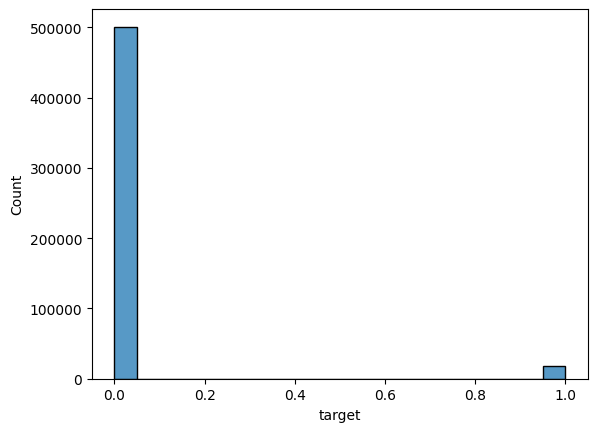

In [44]:
sns.histplot(df['target'])

## Preprocessing

1) Сжимаем коррелирующие группы

In [45]:
corr_groups = [[key, *new_total_groups[key]] for key in new_total_groups.keys()]

In [46]:
corr_groups.extend([[key, *new_total_groups_cat[key]] for key in new_total_groups_cat.keys()])

In [47]:
cols = ['id', 'target']
for group in corr_groups:
    index = np.argmax(df[group].agg(lambda vals: np.std(vals) / np.mean(vals)))
    cols.append(group[index])
    
df = df[list(set(cols))]

In [51]:
df.to_csv('../../data/intermediate_data/filter_train.parquet', index=False)